# Modèles de langues

## Sommaire
* [Modèles N-gram](#modeles-n-gram)
   * [Estimation de la probabilité maximale](#estimation-de-la-probabilite-maximale)
   * [Lissage de Laplace (Laplace smoothing)](#lissage-de-laplace-laplace-smoothing)
   * [Lissage de Good-Turing (Good-Turing smoothing)](#lissage-de-good-turing-good-turing-smoothing)
* [Evaluation et Perplexité](#evaluation-et-perplexite)
* [Mise en pratique](#mise-en-pratique)
   * [Génération de texte](#generation-de-texte)
   * [Classification de texte](#classification-de-texte)

## Modèles N-gram

Dans la continuité de la dernière partie, nous étudierons une autre facette des probabilités conditionnelles *(ou théorie bayésienne)*:

La génération de modèles de langues à partir de la fréquence des N derniers mots dans un texte.

Un modèle de langue permet d'estimer la probabilité d'obtenir un mot à partir des précédents, *souvenez vous de la **loi des grands nombres** qui stipule que l'on peut exprimer une probabilté comme une fréquence de réalisations*.

On parle de modèle N-gram lorsque l'on souhaite entraîner un modèle linguistique à partir des N derniers mots, si on utilise que deux mots on parle de modèle bigram, si on en utilise qu'un seul on parle de modèle unigram.

Ici on utilisera la méthode d'estimation de la probabilité maximale ou *Maximum Likelihood Estimation* afin de calculer la probabilité jointe d'obtenir des séquences de mots, ou N-gram.

### Estimation de la probabilité maximale

La probabilité d'obtenir un mot sachant les N-1 mots précédents est la suivante:

$$ P(w_n|w_1, w_2, \cdots, w_{N-1}) = \frac{\#(w_1, w_2, \cdots, w_{N-1}, w_N)}{\#(w_1, w_2, \cdots, w_{N-1})} $$

Où:
* $\#(w_1, w_2, \cdots, w_{N-1}, w_N)$: La fréquence des N dernier mots (N-gram)
* $\#(w_1, w_2, \cdots, w_{N-1})$: La fréquence des N-1 dernier mots (N-1-gram)

Nous connaissons donc la probabilité conditionnelle des variables aléatoires (ici des mots), mais nous ne connaissons pas la probabilité jointe de ces mots $P(w_1, \cdots, w_Z)$ avec $Z$ un entier représentant la longueur de la séquence de mots.

Pour cela nous utiliserons la **règle de chaîne** qui stipule:

$$ P(x,y) = P(x|y) . P(y) $$

La généralisation à N variables aléatoires nous donne:

$$\begin{align}
P(x_1, \cdots, x_N) & = P\left(\bigcap_{k=1}^{N}x_k\right)
\\ & = P(x_N \ | \ x_1, \cdots, x_{N-1}) \ . \ P(x_1, \cdots, x_{N-1})
\\ & = P(x_N \ | \ x_1, \cdots, x_{N-1}) \ . \ P(x_{N-1} \ | \ x_1, \cdots, x_{N-2}) \ . \ P(x_1, \cdots, x_{N-2})
\\ & = P(x_N | x_1, \cdots, x_{N-1}) \ . \ P(x_{N-1} | x_1, \cdots, x_{N-2}) \ . \ \cdots \ . \ P(x_2 | x_1) \ . \ P(x_1)
\end{align}$$

En d'autres termes:

$$P\left(\bigcap_{k=1}^{N}x_k\right) = \prod_{k=1}^{N}P\left(x_k|\bigcap_{j=1}^{k-1}x_j\right)$$

Cependant on peut simplifier cette formule puisque seuls les Z dernier mots comptent:

$$ P(x_1, \cdots, x_N) = P(x_N \ | \ x_{N-Z+1}, \cdots, x_{N-1}) \ . \ P(x_{N-1} \ | \ x_{N-Z}, \cdots, x_{N-2}) \ . \ \cdots \ . \ P(x_2 \ | \ x_1) \ . \ P(x_1) $$

### Lissage de Laplace (Laplace smoothing)

Lorsque l'on entraîne un modèle de langue à calculer les probabilités de chaque mots en fonction des N derniers mots on utilise la formule précédente:

$$ P(w_n|w_1, w_2, \cdots, w_{N-1}) = \frac{\#(w_1, w_2, \cdots, w_{N-1}, w_N)}{\#(w_1, w_2, \cdots, w_{N-1})} $$

Mais cette méthode a un énorme désavantage; lorsqu'une chaîne de mots spécifique n'est pas contenue dans le corpus d'entraînement alors la probabilité conditionnelle correspondante est de 0, et si un des facteurs est nul le produit des facteurs est nul (*anneau intègre*).

#### Add-1 smoothing:

Pour régler ce problème on utilise le lissage de Laplace (*ou Laplace Smoothing*), cela consiste à ajouter 1 au numérateur, on suppose alors que chaque séquence de N-gram apparaît au moins une fois, puis on ajoute le cardinal de l'ensemble des N-gram (unique) du corpus **|V|** au dénominateur tel que:

$$ P_L(w_N \ | \ w_1, w_2, \cdots, w_{N-1}) = \frac{\#(w_1, w_2, \cdots, w_{N-1}, w_N) + 1}{\#(w_1, w_2, \cdots, w_{N-1}) + |V|} $$

Cependant cette méthode de lissage est sensible aux distorsions pour de grands corpus, par exemple:

$$ P(\text{to} | \text{want}) = \frac{608}{927} = 0.66 $$

Avec le Lissage de Laplace cela devient:

$$ P_L(\text{to} | \text{want}) = \frac{608+1}{927+1446} = 0.26 $$

#### Add-k smoothing:

On peut améliorer ce lissage en utilisant le *Add-k smoothing* qui consiste à remplacer la formule par:

$$ P_L(w_N \ | \ w_1, w_2, \cdots, w_{N-1}) = \frac{\#(w_1, w_2, \cdots, w_{N-1}, w_N) + k}{\#(w_1, w_2, \cdots, w_{N-1}) + k|V|} $$

#### Unigram Prior smoothing:

Une extension du Add-k smoothing est d'utiliser la probabilié du mot $P(w_i)$ au numérateur et de remplacer **k|V|** par **m** tel que:

$$ P_L(w_N \ | \ w_1, w_2, \cdots, w_{N-1}) = \frac{\#(w_1, w_2, \cdots, w_{N-1}, w_N) + mP(w_N)}{\#(w_1, w_2, \cdots, w_{N-1}) + m} $$

### Lissage de Good-Turing (Good-Turing smoothing)

Une autre méthode de lissage plus sophistiquée est le Good-Turing smoothing qui consiste à considérer que la fréquence des variables aléatoires est la même que celles qui ont été observées autant de fois, et considérer que la fréquence des variables aléatoires non observées est la même que celles qui ont été observées qu'une seule fois.

Ainsi le nombre total d'observations est:

$$ N = \sum_{c=1}^{\infty} N_c . c $$

Où:

* $c$: Nombre de fois qu'un élément x a été observé.
* $N_c$: Nombre d'éléments ayant été observés c fois.

Et la probabilité d'obtenir un élément non observé est:

$$ P_{0}(x) = \frac{N_1}{N} $$

Cependant si on calculait ainsi toutes nos probabilités on briserait une loi élémentaire qui stipule que:

$$ \sum_{x \in D}P(x) = 1 $$

C'est pourquoi on résout le dilemne en calculant la fréquence c de la manière suivante:

$$ c^* = \frac{(c+1)N_{c+1}}{N_c} $$

De cette manière on retrouve le nombre total d'observations:

$$ N = \sum_{c=0}^{\infty}N_c . c^* = \sum_{c=0}^{\infty}N_c . c $$

Et finalement la probabilité d'obtenir un élément x observé c fois est:

$$ P_{c}(x) = \frac{c^*}{N} $$

## Evaluation et Perplexité

Comme nous l'avons vu la performance d'un modèle de langue dépend:

* Du corpus de textes d'entraînement
* De la méthode d'estimation des probabilités conditionnelles (ici on a choisi MLE mais il existe d'autres méthodes)
* Du lissage associé à la méthode d'estimation (Laplace, Good-Turing)

Ainsi nous devons évaluer les performances de notre modèle, pour cela il y a deux types d'évaluations:

* L'évaluation extrinsèque
* L'évaluation intrinsèque

L'évaluation extrinséque ne consiste pas à évaluer le modèle directement mais à évaluer l'application end-to-end l'utilisant tel que la reconnaissance vocale, la traduction, ou encore la correction automatique...

L'évaluation intrinsèque consiste à évaluer le modèle tel quel de manière isolé, nous étudierons uniquement l'évaluation intrinsèque qui nous intéresse ici:

La mesure la plus populaire pour un modèle linguistique N-gram est la **Perplexité**, cette mesure permet de savoir à quel point le modèle est bon pour prédire le prochain mot dans les données de validation.

Soit W = ($w_1, \cdots, w_N$) un vecteur de mots dans un corpus de validation (le texte). Alors la perplexité d'un modèle linguistique est:

$$ PP(W) = \sqrt[N]{\frac{1}{P(w_1, \cdots, w_N)}} $$

Plus cette valeur est basse, meilleur est le modèle.

## Mise en pratique

### Génération de texte

*Cette génération de texte se repose sur les formules vues précédemment: l'estimation de la probabilité maximale avec un lissage de Good-Turing*

In [11]:
from nltk.util import ngrams
from collections import defaultdict
from collections import OrderedDict

import re
import nltk
import unidecode

def text_processing(text):
    ''' Return cleaned text for Machine Learning '''
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    NEW_LINE = re.compile('\n')
    BAD_SYMBOLS_RE = re.compile('[^a-z\' #+_]')

    text = text.lower()
    text = unidecode.unidecode(text)
    text = NEW_LINE.sub(' ',text)
    text = REPLACE_BY_SPACE_RE.sub('',text)
    text = BAD_SYMBOLS_RE.sub(' ',text)
    return text

In [12]:
def countCorpus(token, dictTMP, w, n):
    #add the last word from previous line
    if w != '': token.insert(0, w)
    temp = list(ngrams(token, n))
    
    #count the frequency of the n-gram sentences
    for t in temp:
        sen = ' '.join(t)
        dictTMP[sen] += 1
    
    #then take out the last 3 words
    n2 = len(token)

    #store the last few words for the next sentence pairing
    if (n2 - n) >= 0:
        w1 = token[n2 - (n-1)]
    
    return w, dictTMP

#loads the corpus for the dataset and makes the frequency count of quadgram ,bigram and trigram strings
def loadCorpus(files, bi_dict, tri_dict, quad_dict, vocab_dict):

    w1 = ''    #for storing the 3rd last word to be used for next token set
    w2 = ''    #for storing the 2nd last word to be used for next token set
    w3 = ''    #for storing the last word to be used for next token set
    token = []
    #total no. of words in the corpus
    word_len = 0

    #open the corpus file and read it line by line
    for file_path in files:
        with open(file_path,'r', encoding="utf-8") as file:
            for line in file:

                content = text_processing(line)

                token = content.split()
                word_len = word_len + len(token)

                if not token:
                    continue

                w3, bi_dict = countCorpus(token, bi_dict, w3, 2)
                w2, tri_dict = countCorpus(token, tri_dict, w2, 3)
                w1, quad_dict = countCorpus(token, quad_dict, w1, 4)

                #add new unique words to the vocaulary set if available
                for word in token:
                    if word not in vocab_dict:
                        vocab_dict[word] = 1
                    else:
                        vocab_dict[word]+= 1
    return word_len

In [13]:
#for finding the adjusted count c* in Good Turing Smoothing
def findGoodTuringAdjustCount(c, k, nc_dict):
   
    adjust_count = ((((c+1)*(nc_dict[c+1]/nc_dict[c])) - (c*(k+1)*nc_dict[k+1]/nc_dict[1])) /
                    (1-((k+1)*nc_dict[k + 1] / nc_dict[1])))
    return adjust_count

#creates dict for storing probable words with their probabilities for a n-gram sentence
def findNgramProbGT(vocab_dict, n0_dict, n1_dict, n1_prob_dict, nc_dict, k, n):
    
    i = 0
    V = len(vocab_dict)
    for n1_sen in n1_dict:
        n1_token = n1_sen.split()

        #(n-1)-gram sentence for key
        if(n == 2): n0_sen = n1_token[0]
        else: n0_sen = ' '.join(n1_token[:n-1])

        #find the probability
        #Good Turing smoothing has been used
        n1_count = n1_dict[n1_sen]
        if(n == 2): n0_count = vocab_dict[n0_sen]
        else: n0_count = n0_dict[n0_sen]

        if n1_dict[n1_sen] <= k  or (n1_sen not in n1_dict):
            n1_count = findGoodTuringAdjustCount( n1_dict[n1_sen], k, nc_dict)
        if(n == 2):
            if vocab_dict[n0_sen] <= k  or (n0_sen not in vocab_dict):
                n0_count = findGoodTuringAdjustCount(vocab_dict[n0_sen], k, nc_dict)
        else:
            if n0_dict[n0_sen] <= k  or (n0_sen not in n0_dict):
                n0_count = findGoodTuringAdjustCount(n0_dict[n0_sen], k, nc_dict)

        prob = n1_count / n0_count

        #add the (n-1)-gram to the n-gram probabiltity dict
        if n0_sen not in n1_prob_dict:
            n1_prob_dict[n0_sen] = []
            n1_prob_dict[n0_sen].append([prob,n1_token[-1]])
        else:
            n1_prob_dict[n0_sen].append([prob,n1_token[-1]])
            
    #sort the probable word acc. to their probabilities
    for key in n1_prob_dict:
        if len(n1_prob_dict[key])>1:
            n1_prob_dict[key] = sorted(n1_prob_dict[key],reverse = True)[:n-1] #Warning ??

In [14]:
## Regression related stuff
#calculate best fit line for simple regression 
from statistics import mean
import numpy as np

#finds the slope for the best fit line
def findBestFitSlope(x,y):
    m = ((mean(x)*mean(y)-mean(x*y)) / (mean(x)**2-mean(x**2)))
    return m
      
#finds the intercept for the best fit line
def findBestFitIntercept(x,y,m):
    c = mean(y) - m*mean(x)
    return c

## Find the count Nc for quadgrams and trigrams where c > 5
#token_len : total no. of ngram tokens
def findFrequencyOfFrequencyCount(ngram_dict, k, n, V, token_len):
    #for keeping count of 'c' value i.e Nc
    nc_dict = {}
    #we find the value of Nc,c = 0 by V^n - (total n-gram tokens)
    nc_dict[0] = V**n - token_len
    #find the count Nc till c = k,we will take k = 5
    #find counts for n-gram
    for key in ngram_dict:
        if ngram_dict[key] <= k + 1:
            if ngram_dict[key] not in nc_dict:
                nc_dict[ ngram_dict[key]] = 1
            else:
                nc_dict[ ngram_dict[key] ] += 1
    
    #check if all the values of Nc are there in the nc_dict or not ,if there then return           
    val_present = True
    for i in range(1,7):
        if i not in nc_dict:
            val_present = False
            break
    if val_present == True:
        return nc_dict
    
    #now fill in the values of nc in case it is not there using regression upto c = 6
    #we use :[ log(Nc) = blog(c) + a ] as the equation

    #we first need to find data for regression that is values(Nc,c) we take 5 data points
    data_pts = {}
    i = 0
    #get first 5 counts value i.e c
    #for quadgram
    for key in ngram_dict:
        if ngram_dict[key] not in data_pts:
                data_pts[ ngram_dict[key] ] = 1
                i += 1
        if i >5:
            break
            
    #now get Nc for those c values
    for key in ngram_dict:
        if ngram_dict[key] in data_pts:
            data_pts[ ngram_dict[key] ] += 1
    
    #make x ,y coordinates for regression 
    x_coor = [ np.log(item) for item in data_pts ]
    y_coor = [ np.log( data_pts[item] ) for item in data_pts ]
    x = np.array(x_coor, dtype = np.float64)
    y = np.array(y_coor , dtype = np.float64)
   

    #now do regression
    #find the slope and intercept for the regression equation
    slope_m = findBestFitSlope(x,y)
    intercept_c = findBestFitIntercept(x,y,slope_m)

    #now find the missing Nc terms and give them value using regression
    for i in range(1,(k+2)):
        if i not in nc_dict:
            nc_dict[i] = (slope_m*i) + intercept_c
    
    return nc_dict

In [15]:
#finds the word prediction usinng Backoff
def doPredictionBackoffGT(input_sen, bi_dict, tri_dict, quad_dict, bi_prob_dict, tri_prob_dict, quad_prob_dict):
    #split the input sentence into tokens
    token = input_sen.split()
    #if the input sen is found in any ngram then give the most probable word for that ngram
    #if not then go to the lower order ngram
    if input_sen in quad_prob_dict and quad_prob_dict[input_sen][0][0] > 0:
        pred = quad_prob_dict[input_sen][0]
    elif ' '.join(token[1:]) in tri_prob_dict and tri_prob_dict[' '.join(token[1:])][0][0]>0:
        pred = tri_prob_dict[ ' '.join(token[1:]) ][0]
    elif ' '.join(token[2:]) in bi_prob_dict and bi_prob_dict[ ' '.join(token[2:]) ][0][0]>0:
        pred = bi_prob_dict[' '.join(token[2:])][0]
    else:
        pred = []
    return pred

vocab_dict = defaultdict(int)          #for storing the different words with their frequencies    
bi_dict = defaultdict(int)             #for keeping count of sentences of two words
tri_dict = defaultdict(int)            #for keeping count of sentences of three words
quad_dict = defaultdict(int)           #for keeping count of sentences of four words
quad_prob_dict = OrderedDict()
tri_prob_dict = OrderedDict()
bi_prob_dict = OrderedDict()

#load the corpus for the dataset
train_files = ['data/corpus_1.txt', 'data/corpus_2.txt', 'data/corpus_3.txt', 'data/corpus_4.txt']
#load corpus
token_len = loadCorpus(train_files, bi_dict, tri_dict, quad_dict, vocab_dict)

k = 5
V = len(vocab_dict)
quad_nc_dict = findFrequencyOfFrequencyCount(quad_dict, k, 4, V, len(quad_dict))
tri_nc_dict = findFrequencyOfFrequencyCount(tri_dict, k, 3, V, len(tri_dict))
bi_nc_dict = findFrequencyOfFrequencyCount(bi_dict, k, 2, V, len(bi_dict))
uni_nc_dict = findFrequencyOfFrequencyCount(bi_dict, k, 1, V, len(vocab_dict))

#create quadgram probability dictionary
findNgramProbGT(vocab_dict, tri_dict, quad_dict, quad_prob_dict, quad_nc_dict, k, 4)
#create trigram probability dictionary
findNgramProbGT(vocab_dict, bi_dict, tri_dict, tri_prob_dict, tri_nc_dict, k, 3)
#create bigram probability dictionary
findNgramProbGT(vocab_dict, bi_dict, bi_dict, bi_prob_dict, bi_nc_dict, k, 2)

input_sen = "Ceci est une phrase"
print("Phrase de test: ", input_sen)
for i in range(3):
    temp = input_sen.split()
    temp = temp[-3:]
    temp = " ".join(temp)
    prediction = doPredictionBackoffGT(temp, bi_dict, tri_dict, quad_dict, bi_prob_dict, tri_prob_dict, quad_prob_dict)
    if prediction:
        input_sen = input_sen+' '+prediction[1]
print('\nPrédiction:\n', input_sen)

Phrase de test:  Ceci est une phrase

Prédiction:
 Ceci est une phrase simple et energique


### Classification de texte

Pour calculer la probabilité d'obtenir une classe sachant un corpus de texte, on utilise le **théorème de Bayes**:

$$ P(C | w_1, \cdots, w_n) = \frac{P(C)P(w_1, \cdots, w_n | C)}{P(w_1, \cdots, w_n)} $$

Or on connaît déjà $P(w_1, \cdots, w_n)$ que l'on a calculé auparavant.

En utilisant la **règle de chaîne** on obtient:

$$ P(C)P(w_1, \cdots, w_n | C) = P(C) . P(w_1|C) . P(w_2 | C, w_1) . \cdots . P(w_n | C, w_1, \cdots, w_{N-1})
\\ \implies P(w_1, \cdots, w_n | C) = P(w_1|C) . P(w_2 | C, w_1) . \cdots . P(w_n | C, w_1, \cdots, w_{N-1})$$

On parle d'algorithme bayésien naïf (naive bayes) lorsque l'on suppose que les mots n'ont pas de corrélation entre eux, cet algorithme est de manière surprenante efficace et transforme la formule en:

$$ P(w_1, \cdots, w_n | C) = P(w_1|C) . P(w_2 | C) . \cdots . P(w_n | C) = \prod_{k=1}^{N}P(w_k|C) $$

Ainsi on obtient:

$$ P(C | w_1, \cdots, w_N) = \frac{P(C) . \prod_{k=1}^{N}P(w_k|C)}{P(w_1, \cdots, w_n)} $$

Ici nous testerons l'efficacité de l'algorithme bayésien naïf sur des SMS en les classants entre spam et normal:

In [16]:
import os
import re
import nltk
import unidecode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def NB_text_processing(text):
    ''' Return cleaned text for Machine Learning '''
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    NEW_LINE = re.compile('\n')
    BAD_SYMBOLS_RE = re.compile('[^a-z #+_]')
    STOPWORDS = set(nltk.corpus.stopwords.words('english'))
    STEMMER = SnowballStemmer('english')

    text = text.lower()
    text = unidecode.unidecode(text)
    text = NEW_LINE.sub(' ',text)
    text = REPLACE_BY_SPACE_RE.sub('',text)
    text = BAD_SYMBOLS_RE.sub(' ',text)
    text = ' '.join([STEMMER.stem(word) for word in text.split() if word not in STOPWORDS])
    return text

def NB_preprocessing(data):
    ''' Return train, validation and test set '''
    X = data['v2'].tolist()
    X = [NB_text_processing(txt) for txt in X]
    cv = CountVectorizer(max_features = 5000)

    X = cv.fit_transform(X).toarray()
    Y = data['v1'].tolist()
    
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15,train_size=0.85)
    print('train len:', len(x_train))
    print('test len:', len(x_test))

    return x_train, x_test, y_train, y_test

def NB_Model(data):
    ''' Create a model based on Naive Bayes '''
    x_train, x_test, y_train, y_test = NB_preprocessing(data)
    classifier = MultinomialNB()
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['Ham', 'Spam'])

In [17]:
data = pd.read_csv(("data/spam.csv"), encoding='latin1')
data = data[['v1', 'v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


train len: 4736
test len: 836
Accuracy: 0.9880382775119617


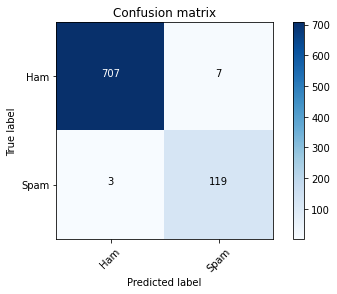

In [18]:
NB_Model(data)